In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Reading in the data

In [2]:
df = pd.read_csv('time_needed2.csv')

In [3]:
df.drop('Unnamed: 0',axis = 1, inplace= True)

In [4]:
df['xSize'] = df['xSize'] * 195932

In [5]:
df.columns

Index(['xSize', 'yTime'], dtype='object')

# Power fit

In [6]:
reg = LinearRegression().fit(np.log(df['xSize'].to_numpy()).reshape(-1, 1), np.log(df['yTime'].to_numpy()).reshape(-1, 1))

In [7]:
b = reg.coef_[0][0]
b

1.7002209151148178

In [8]:
a = np.exp(reg.intercept_)[0]
a

7.285645548725187e-07

In [9]:
yPower = a * (df['xSize'] ** b)

# Squared function

In [10]:
ySquare = np.square(df['xSize'])

# Quadratic polynomial fit

In [11]:
poly = PolynomialFeatures(degree=2)
Xpoly = poly.fit_transform(df['xSize'].to_numpy().reshape(-1, 1))


In [12]:
polyReg = LinearRegression().fit(Xpoly, df['yTime'].to_numpy().reshape(-1, 1))

In [13]:
yPolyDeg2 = polyReg.predict(Xpoly)

In [14]:
polyReg.coef_[0]

array([ 0.00000000e+00, -7.93600110e-04,  2.29073528e-08])

In [15]:
polyReg.intercept_

array([67.4468367])

# Creating the plot 

Text(0.5, 1.0, 'Time needed to train an SVR model')

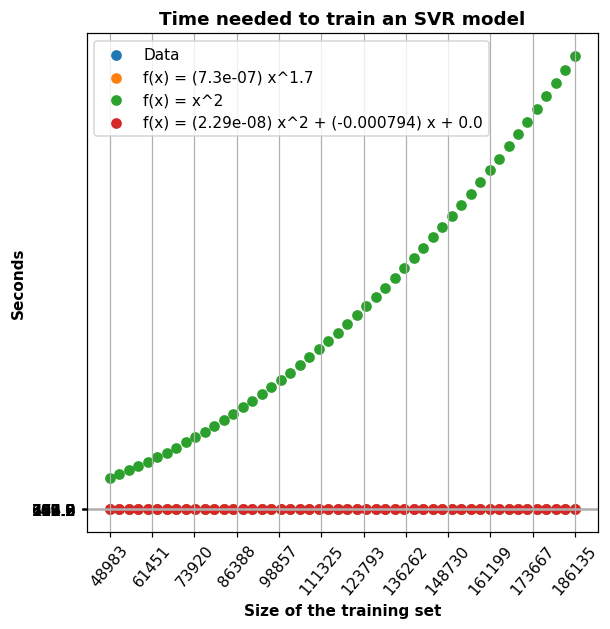

In [18]:
xticks = np.linspace(start = np.min(df['xSize']), stop = np.max(df['xSize']), num = 12)

yticks = np.linspace(start = np.min(df['yTime']), stop = np.max(df['yTime']), num = 12)



matplotlib.rcParams["figure.dpi"] = 110

fig = plt.figure(figsize=(6, 6))

# plt.figure(dpi = 120)

ax = plt.subplot()

plt.grid()

plt.scatter(x = df['xSize'],
            y = df['yTime'],
            label= 'Data'
           )

plt.scatter(x = df['xSize'],
            y = yPower,
            label= f'f(x) = ({round(a, 8)}) x^{round(b, 3)}',
            alpha = 1
           )

plt.scatter(x = df['xSize'],
            y = ySquare,
            label= f'f(x) = x^2',
            alpha = 1
           )

plt.scatter(x = df['xSize'],
            y = yPolyDeg2,
            label = f'f(x) = ({round(polyReg.coef_[0][2], 10)}) x^2 + ({round(polyReg.coef_[0][1], 6)}) x + {polyReg.coef_[0][0]}',
            alpha = 1
           )

plt.xticks(xticks)

plt.xticks(rotation = 50)

plt.yticks(yticks)

plt.legend(loc="upper left")


ax.set_xlabel('Size of the training set', fontweight ='bold')

ax.set_ylabel('Seconds', fontweight ='bold')

ax.set_title('Time needed to train an SVR model', fontweight ='bold')

Text(0.5, 1.0, 'Time needed to train an SVR model')

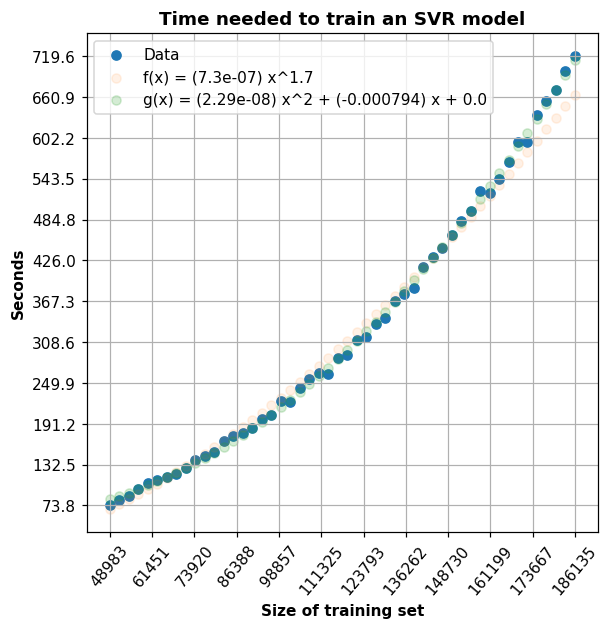

In [19]:
xticks = np.linspace(start = np.min(df['xSize']), stop = np.max(df['xSize']), num = 12)

yticks = np.linspace(start = np.min(df['yTime']), stop = np.max(df['yTime']), num = 12)



matplotlib.rcParams["figure.dpi"] = 110

fig = plt.figure(figsize=(6, 6))

# plt.figure(dpi = 120)

ax = plt.subplot()

plt.grid()

plt.scatter(x = df['xSize'],
            y = df['yTime'],
            label= 'Data'
           )

plt.scatter(x = df['xSize'],
            y = yPower,
            label = f'f(x) = ({round(a, 8)}) x^{round(b, 3)}',
            alpha = .1
           )

plt.scatter(x = df['xSize'],
            y = yPolyDeg2,
            label = f'g(x) = ({round(polyReg.coef_[0][2], 10)}) x^2 + ({round(polyReg.coef_[0][1], 6)}) x + {polyReg.coef_[0][0]}',
            alpha = .2
           )

plt.xticks(xticks)

plt.xticks(rotation = 50)

plt.yticks(yticks)

plt.legend(loc="upper left")


ax.set_xlabel('Size of training set', fontweight ='bold')

ax.set_ylabel('Seconds', fontweight ='bold')

ax.set_title('Time needed to train an SVR model', fontweight ='bold')